In [1]:
import tensorflow



# Multilayer Perceptron (MLP) = Artificial Neural Network (ANN)

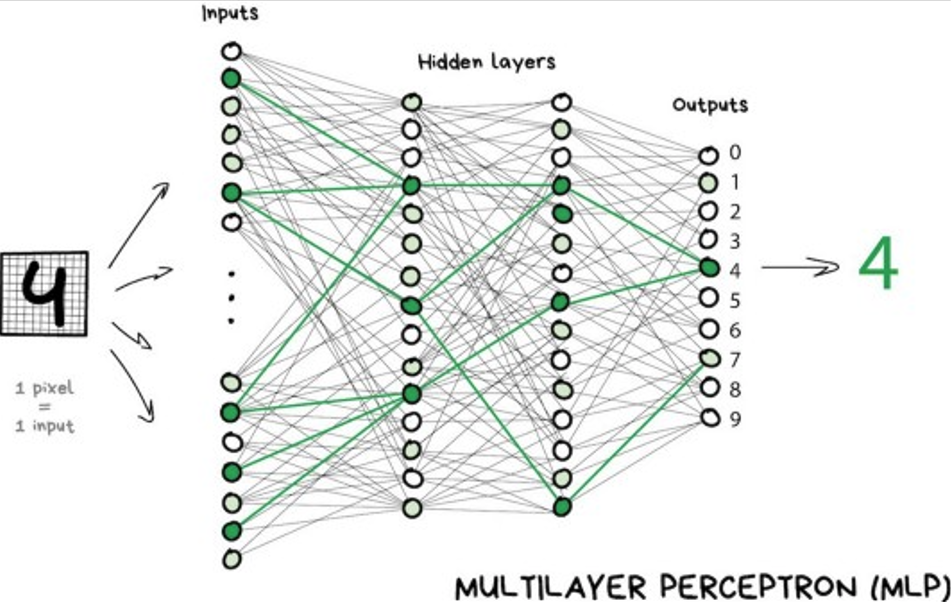

## (1) MLP for Binary Classification

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


df = pd.read_csv("Lesson50-ionosphere.csv",header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
X,y = df.values[:,:-1],df.values[:,-1]
X

array([[1, 0, 0.99539, ..., -0.54487, 0.18641, -0.453],
       [1, 0, 1.0, ..., -0.06288, -0.13738, -0.02447],
       [1, 0, 1.0, ..., -0.2418, 0.56045, -0.38238],
       ...,
       [1, 0, 0.94701, ..., 0.00442, 0.92697, -0.00577],
       [1, 0, 0.90608, ..., -0.03757, 0.87403, -0.16243],
       [1, 0, 0.8471, ..., -0.06678, 0.85764, -0.06151]], dtype=object)

In [4]:
y = LabelEncoder().fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
import numpy as np 
X = X.astype("float32")

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

n_features = X_train.shape[1]
n_features

34

In [7]:
from tensorflow.keras.layers import Input


model = Sequential()
model.add(Input(shape=(n_features,)))
model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))   #hidden layer
model.add(Dense(8,activation = "relu",kernel_initializer = "he_normal"))   #hidden layer
model.add(Dense(1,activation = "sigmoid"))   #output


#compile the model

model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [8]:
model.fit(x=X_train,y=y_train,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7872 - loss: 0.5646  
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7915 - loss: 0.5415 
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.5228 
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8170 - loss: 0.5066 
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.4917 
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.4774 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8340 - loss: 0.4639 
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.4521 
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - loss: 0.4390 
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.4274 
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8468 - loss: 0.4163 
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - lo

In [9]:
loss,accuracy = model.evaluate(X_test,y_test,verbose=1)
accuracy 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9138 - loss: 0.2182  


0.9137930870056152

## (2) ANN (MLP) for Multiclass Classification

In [10]:
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white")
%matplotlib inline

from sklearn import decomposition,datasets

In [11]:
iris = datasets.load_iris()
X=iris.data
y = iris.target
X.shape

(150, 4)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
n_features = X_train.shape[1]
n_features

4

In [13]:
model = Sequential()
model.add(Input(shape=(n_features,)))
model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(8,activation = "relu",kernel_initializer="he_normal"))
model.add(Dense(3,activation = "softmax"))

model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [14]:
model.fit(X_train,y_train,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3800 - loss: 2.1880  
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3900 - loss: 2.1101 
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4500 - loss: 2.0379 
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5900 - loss: 1.9777 
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6500 - loss: 1.9175 
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6600 - loss: 1.8526 
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6700 - loss: 1.7945 
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6700 - loss: 1.7390 
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6700 - loss: 1.6838 
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6800 - loss: 1.6303 
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6800 - loss: 1.5818 
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6900 - lo

In [15]:
loss,accuracy = model.evaluate(X_test,y_test,verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8800 - loss: 0.3274 


In [16]:
X_train.shape

(100, 4)

In [17]:
row = np.array([[2.1,1.8,1.4,1.2]])

row.shape

(1, 4)

In [18]:

yhat = model.predict(row)
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.10117682, 0.5722902 , 0.32653293]], dtype=float32)

In [19]:
argmax(yhat)

np.int64(1)

## (3) ANN(MLP) for Regression

In [20]:
from numpy import sqrt

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [21]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
X = pd.DataFrame(data)
y = pd.DataFrame(target)
X.columns = feature_names
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

n_features = X_train.shape[1]
n_features


13

In [23]:

model = Sequential()
model.add(Input(shape=(n_features,)))
model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(8,activation = "relu",kernel_initializer="he_normal"))
model.add(Dense(1))

model.compile(optimizer="adam",loss = "mse")

model.fit(X_train,y_train,epochs=150,batch_size=32,verbose=0)

error = model.evaluate(X_test,y_test,verbose=0)

sqrt(error)

np.float64(6.84912678519872)

In [24]:
# predict with a specific example 
row = np.array([[0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]])
y_pred = model.predict(row)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[28.146296]], dtype=float32)